# Matrix-Matrix Multiplication using MPI In Python 
[//]: <> (Notebook Author: Thomas Cullison, Stanford University, Jan. 2023)
[//]: <> (GEOPHYS 257 -- Winter 2023)


The focus of this lab parallel computing using the Message Passing Interface ([MPI](https://en.wikipedia.org/wiki/Message_Passing_Interface)) standard within Python.  When learning to parallel program or when learning to use a new parallel programing paradigm, it's good to pick a problem to solve that you already understand and that can make adequit use of the paradigm's features. A good example of a general problem that can be parallelized and that is understood by most scientists, is matrix-matrix multiplication. For some problems with sufficiently large matrices (models with millions or billions of paramenters), parallel matrix-matrix multiplication, is sometimes the only option.

For this lab, your task is to write a Python code that parallelizes the matrix-matrix multiplication problem using the [mpi4py](https://mpi4py.readthedocs.io/en/stable/) Python module. Futhermore, your code needs to run on the virtual Slurm cluster via an [sbatch](https://slurm.schedmd.com/sbatch.html) script.

## External Resources
If you have any question regarding some specific Python functionality you can consult the official [Python documenation](http://docs.python.org/3/).


### MPI
* [Intro to MPI](https://youtu.be/SCIYgBIm6LM)
* [Point-to-Point Communication](https://youtu.be/3LiIZCWf_5Q)
* [Collective Communication](https://youtu.be/ryC-L3qF33k)
* [Data Types and Topologies](https://youtu.be/nNCDgAU76D0)
* [LLNL Tutorial and General Info](https://hpc-tutorials.llnl.gov/mpi/)
* [Simple C and Fortran Examples](https://hpc-tutorials.llnl.gov/mpi/exercise_1/)

### mpi4py
* [Basic Tutorial](https://youtu.be/36nCgG40DJo)
* [readthedocs](https://mpi4py.readthedocs.io/en/stable/)
* [Cartesian Topologies](https://learn2codewithmesite.wordpress.com/2017/10/16/creating-topologies-in-mpi4py/)
* [Cartcomm](https://mpi4py.readthedocs.io/en/stable/reference/mpi4py.MPI.Cartcomm.html#mpi4py.MPI.Cartcomm.Get_cart_rank)
* [Basic Tutorial](https://mpi4py.readthedocs.io/en/stable/tutorial.html)

### Slurm/sbatch
* [Simple Example Scripts](https://www.carc.usc.edu/user-information/user-guides/hpc-basics/slurm-templates)
* [Slurm Tutorials](https://slurm.schedmd.com/tutorials.html)

## Requirements
1. Stick with square $N \times N$ matrices only
1. Parallelize over $M \in \mathbb{N}$ process, and be sure $\sqrt{M} \in \mathbb{N}$ and that $N$ is evenly divisable by $\sqrt{M}$. A good example is shown in **Figure-1** below, for the case where $N = 4$ and $M=4$ (notice that $N$ is evenly divisible by $\sqrt{M} = 2$). Also, make sure your code works for both float32 matrices and float64 matrices. This can be done by using a varible for the numpy array *dtype*.
1. In a "real-world" case, each process would likely read or fetch their respective data from the $\mathbf A$ and $\mathbf B$ matrices.  To mimic this, somewhat, for this lab, we will generate the data for each of these matrices using *np.random.rand()*. However, if you examine the first two cases in **Figure-1** you will notice that both processes use the same data from $\mathbf A$, and the same is true for the 3rd and 4th cases. Futhermore, the 1st and 3rd processes use the same data from $\mathbf B$, and the same is true for the 2nd and 4th processes. So, for your code:
    * Create the data for each "row-block" of $\mathbf A$ only once per block, and send it to all other processes that need that block, but not to the processes that don't need it.
    * Similarly, create the data for each "column-block" of $\mathbf B$ only once per block, then send it to all other processes that need that block, but not to processes that don't need it.
4. Before running a Slurm sbatch job. Besure that you test your code on a single node. A good test would be to use $M = 4$ processes, and $N = 4$ rows and columns (like **Figure-1**). Also make sure to test that your parallel version calculates the same answer as a serial (single process version). This later test can be done in the same Python code, but it can be tricky.
1. After the above tests pass, then setup an sbatch script (a skeleton example is included in the repo for this lab) to submit your code to the cluster. Only use the **preempt** queue, and **please be mindful** of the number of nodes you use. Besure to test the following cases (you will be limited on how much memory you can use due to what I think is a bug in *mpi4py* related to an integer-overflow):
    * 2 nodes each with 8 process and both $N=20240$ and $N=40960$
    * 4 nodes each with 16 process and both $N=20240$ and $N=40960$
    * Each of the above with matrices of type float32 and then float64
6. Commit the following to your repository for this lab: 
    * A small report  comparing the performances between the tests in task-5 above, including a discussion regarding your thoughts on the speedup/slowdown between the float32 and float64 runs and between the 2-node and 4-node runs.
    * Your slurm *.job* files for each of the runs in task-5.
    * Your MPI Python matrix-matrix multiply code.
    * One of the sbatch scripts you used.
    
#### Note: There are multiple ways to solve the matrix-matrix multiplication problem using MPI. So, I'm not looking for the *best* solution. Just one that works.

### Figure-1: Example of how to decompose matrix-matrix multiplciation
For this case, the matrix $\mathbf C \in \mathbb{R}^{4x4}$ is decomposed into 4 sections, thus we want to run $M = 4$ parallel process -- one process (rank) for each colored block region of the $\mathbf C$ matrix.

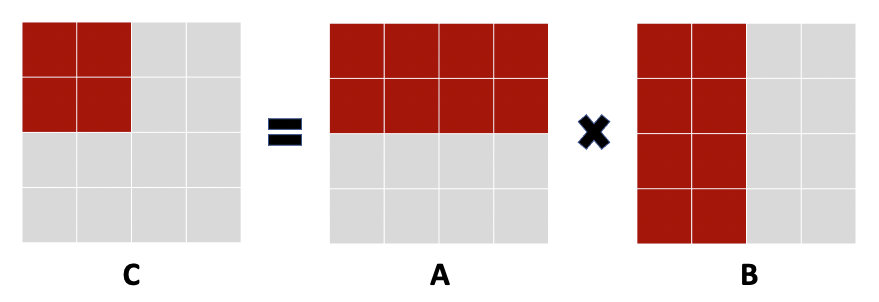

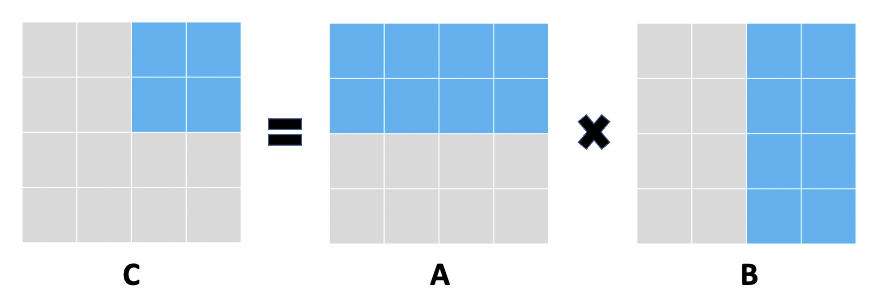

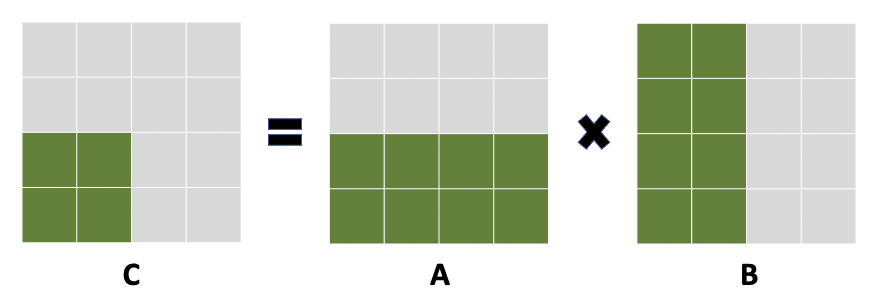

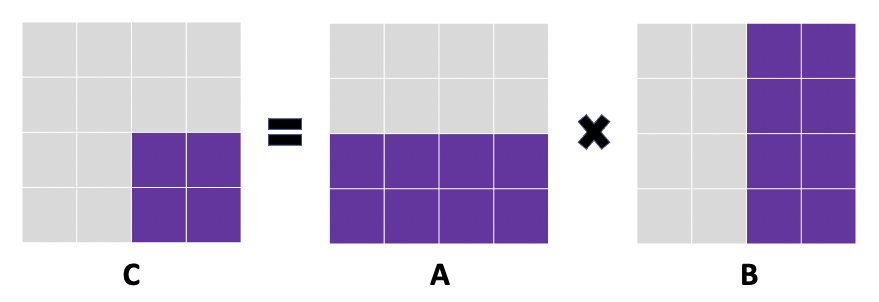